# Machine Learning - Final Project
## Accident Severity Prediction
**Team**: *Jennifer Lord, Konstantinos Georgiou, Russ Limber, Sanjeev Singh, Sara Howard*

## Where to put the code
- Place the preprocessing functions/classes in [\<project root\>/project_libs/project/preprocessing.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/preprocessing.py)
- The models in [\<project root\>/project_libs/project/models.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/models.py)
- Any plotting related functions in [\<project root\>/project_libs/project/plotter.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/plotter.py)


**The code is reloaded automatically. Any class object needs to reinitialized though.** 

## Config file
The yml/config file is located at: [confs/prototype1.yml](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/confs/prototype1.yml)<br>
To load it run:
```python
config_path='confs/prototype1.yml'
conf = Configuration(config_src=config_path)
# Get the dataset loader config
loader_config = conf.get_config('data_loader')['config']['dataset'] # type = Dict
print(books.keys())
print(loader_config['url'])
```
To reload the config just run the 2nd and 3rd command.

## Libraries Overview:
All the libraries are located under *"\<project root>/project_libs"*
- project_libs/**project**: This project's code (imported later)
- project_libs/**configuration**: Class that creates config objects from yml files
- project_libs/**fancy_logger**: Logger that can be used instead of prints for text formatting (color, bold, underline etc)

## For more info check out:
- the **[Project Board](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/projects/1)**
- and the **[Current Issues](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/issues)**

# ------------------------------------------------------------------

## On Google Collab?
- **If yes, run the two cells and press the two buttons below:**
- Otherwise go to "***Import the base Libraries***"

In [24]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display
# Clone the repository if you're in Google Collab
def clone_project(is_collab: bool = False):
    print("Cloning Project..")
    !git clone https://github.com/UTK-ML-Dream-Team/accident-severity-prediction.git
    print("Project cloned.")
       
print("Clone project?")
print("(If you do this you will ovewrite local changes on other files e.g. configs)")
print("Not needed if you're not on Google Collab")
btn = widgets.Button(description="Yes, clone")
btn.on_click(clone_project)
display(btn)

Clone project?
(If you do this you will ovewrite local changes on other files e.g. configs)
Not needed if you're not on Google Collab


Button(description='Yes, clone', style=ButtonStyle())

Cloning Project..
Cloning into 'accident-severity-prediction'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 186 (delta 103), reused 118 (delta 46), pack-reused 0
Receiving objects: 100% (186/186), 294.05 KiB | 3.77 MiB/s, done.
Resolving deltas: 100% (103/103), done.
Project cloned.


In [25]:
# Clone the repository if you're in Google Collab
def change_dir(is_collab: bool = False):
    try:
        print("Changing dir..")
        os.chdir('/content/accident-severity-prediction')
        print('done')
        print("Current dir:")
        print(os.getcwd())
        print("Dir Contents:")
        print(os.listdir())
        print("\nInstalling Requirements")
        !pip install -r requirements.txt
    except Exception:
        print("Error: Project not cloned")
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

Changing dir..
done
Current dir:
/content/accident-severity-prediction
Dir Contents:
['setup.py', 'README.md', 'project_libs', 'main.ipynb', '.gitattributes', 'confs', 'Makefile', 'old_files', '.git', '.gitignore', 'accident-severity-prediction', 'data', 'requirements.txt']

Installing Requirements


### To commit and push Google Collab notebook to Github
Click **File > Save a copy on Gihtub**

# ------------------------------------------------------------------

# Initializations

## Import the base Libraries

In [131]:
# Imports
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats = ['png']
from importlib import reload as reload_lib
from typing import *
import os
import re
from pprint import pprint
import datetime 
import time
# Numpy
import numpy as np
import pandas as pd

# Import preprocessing lib
from project_libs.project import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the YML file

In [2]:
from project_libs import Configuration

In [3]:
# The path of configuration and log save path
config_path = "confs/prototype1.yml"
# !cat "$config_path"
# Load the configuratåion
conf = Configuration(config_src=config_path)
# Get the books dict
loader_config = conf.get_config('data_loader')['config']['dataset']
preprocessing_config = conf.get_config('data_loader')['config']['preprocessing']
# print(books.keys())
# pprint(books)  # Pretty print the books dict

2021-11-29 17:31:46 Config       INFO     Configuration file loaded successfully from path: /Users/sanjeevsingh/Dropbox/Courses/COSC522/FinalProject/accident-severity-prediction/confs/prototype1.yml
2021-11-29 17:31:46 Config       INFO     Configuration Tag: prototype_1


# ------------------------------------------------------------------

# Start of Project Code

In [4]:
from project_libs import project as proj

## Data Loading

In [5]:
# Download Dataset again if requested
should_download = loader_config['download']
if should_download:
    kaggle_dataset_name = loader_config['kaggle_dataset_name']
    !mkdir ~/.kaggle
    !cp confs/kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !mkdir data
    !cd data && kaggle datasets download -d $kaggle_dataset_name && unzip -o us-accidents.zip && rm us-accidents.zip

mkdir: /Users/sanjeevsingh/.kaggle: File exists
mkdir: data: File exists
zsh:1: command not found: kaggle


In [6]:
# Load Dataset
accidents_df_original = pd.read_csv(loader_config['local_dataset_name'])
accidents_df = accidents_df_original.copy()

## Exploration

### Sampling Tests

In [7]:
# Print Basic Info
print(f"Number of rows: {accidents_df.shape[0]}")
print(f"Number of Columns: {accidents_df.shape[1]}")
print(f"Columns: {accidents_df.columns}")

Number of rows: 1516064
Number of Columns: 47
Columns: Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [8]:
# -- Filter By Cities -- #
print("Unique Cities: ")
cities = accidents_df.City.unique().tolist()
print(f"{cities[:10]}, ..")
print(f"Number of cities: {len(cities)}")
print("----------------------------------------------------")

# Try different number of cities filters
for num_cities in [20, 50, 100, 500, 1000, 1500, 2000]:
    current_num = accidents_df[accidents_df.City.isin(cities[:num_cities])].shape[0]
    print(f"Number of rows when only FIRST {num_cities} were included: {current_num}")

Unique Cities: 
['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg', 'Batavia', 'Cleveland', 'Lima', 'Westerville', 'Jamestown'], ..
Number of cities: 10658
----------------------------------------------------
Number of rows when only FIRST 20 were included: 28208
Number of rows when only FIRST 50 were included: 49824
Number of rows when only FIRST 100 were included: 62172
Number of rows when only FIRST 500 were included: 279012
Number of rows when only FIRST 1000 were included: 693738
Number of rows when only FIRST 1500 were included: 775703
Number of rows when only FIRST 2000 were included: 1037886


In [9]:
# -- Filter By Date -- #
accidents_df.loc[:, 'Start_Time_dt'] = pd.to_datetime(accidents_df.Start_Time)
print(f"Earliest date: {accidents_df.Start_Time_dt.min()}")
print(f"Most Recent date: {accidents_df.Start_Time_dt.max()}")
print("----------------------------------------------------")

# Try different date filters
dates = [(2017, 1), (2018, 1), (2019, 1), (2020, 1), (2020, 6), (2020, 9)]
for year, month in dates:
    condition = accidents_df.Start_Time_dt.dt.date>=datetime.date(year=year,month=month,day=1)
    current_num = accidents_df.Start_Time_dt[condition].shape[0]
    print(f"Number of rows when only dates STARTED FROM {month}/{year} were included: {current_num}")


Earliest date: 2016-02-08 00:37:08
Most Recent date: 2020-12-31 23:28:56
----------------------------------------------------
Number of rows when only dates STARTED FROM 1/2017 were included: 1386739
Number of rows when only dates STARTED FROM 1/2018 were included: 1216640
Number of rows when only dates STARTED FROM 1/2019 were included: 1049704
Number of rows when only dates STARTED FROM 1/2020 were included: 787932
Number of rows when only dates STARTED FROM 6/2020 were included: 546313
Number of rows when only dates STARTED FROM 9/2020 were included: 480503


In [10]:
# -- Filter By States and Date -- #
print("Unique States: ")
states = accidents_df.State.unique().tolist()
print(states[:10])
print(f"Number of states: {len(states)}")
print("----------------------------------------------------")

# Filter By NE States
staes_of_choice =  ['PA', 'NY', 'VY', 'ME', 'NH', 'MA', 'RI', 'CT', 'NJ', 'DE', 'DC', 'MD']
accidents_df_filtered = accidents_df[accidents_df.State.isin(staes_of_choice)].copy()
print(f"Number of rows when only North Eastern states were included: {accidents_df_filtered.shape[0]}")

# By Date
year, month = 2020, 1
condition = accidents_df_filtered.Start_Time_dt.dt.date>=datetime.date(year=year,month=month,day=1)
current_num = accidents_df_filtered.Start_Time_dt[condition].shape[0]
print(f"Number of rows when only dates STARTED FROM {month}/{year} for the North Easter States were included: {current_num}")

Unique States: 
['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX']
Number of states: 49
----------------------------------------------------
Number of rows when only North Eastern states were included: 206216
Number of rows when only dates STARTED FROM 1/2020 for the North Easter States were included: 114565


### Correlation between features

In [11]:
from project_libs.project import plotter as pl

['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']


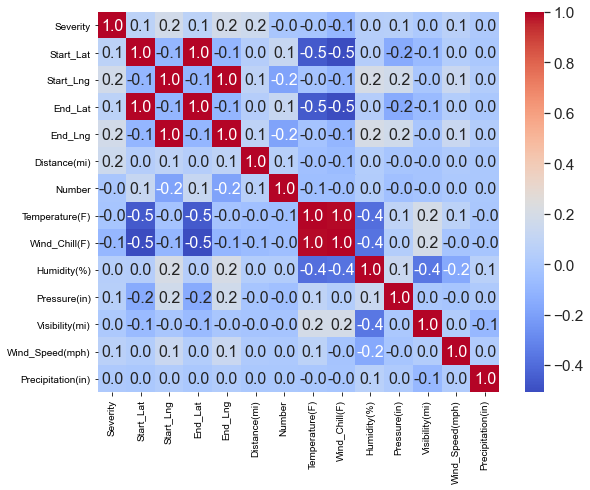

In [12]:
# Find Correlations between columns
cols_to_visualize = list(accidents_df_original.describe().columns)
print(cols_to_visualize)
pl.viz_columns_corr(accidents_df_original, cols_to_visualize)

## Preprocessing

In [13]:
from project_libs.project import preprocessing as pre

In [14]:
# Create a copy of the df
accidents_df_isolated = accidents_df_original.copy()

# Isolate city state
city_list = preprocessing_config['city_list']
state_list = preprocessing_config['state_list']
accidents_df_isolated = pre.isolate_city_state(accidents_df_isolated, city_list, state_list)
display(accidents_df_isolated)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
98138,A-2814738,3,2016-11-30 15:01:56,2016-11-30 21:01:56,33.662770,-111.999580,33.66622,-111.99952,0.238,At AZ-101-LOOP/Exit 15 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
98139,A-2814739,2,2016-11-30 15:19:52,2016-11-30 21:19:52,33.668760,-112.072750,33.66898,-112.05849,0.820,At 7th St/Exit 26 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
98141,A-2814741,2,2016-11-30 17:05:39,2016-11-30 23:05:39,33.484250,-112.113190,33.47491,-112.11320,0.645,At Thomas Rd/Exit 201 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
98142,A-2814742,2,2016-11-30 17:10:37,2016-11-30 23:10:37,33.295215,-111.972420,33.28853,-111.97132,0.466,At Chandler Blvd/Exit 160 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
98146,A-2814746,2,2016-11-30 18:28:58,2016-12-01 00:28:58,33.461900,-112.092145,33.46190,-112.09904,0.397,At 19th Ave/Exit 143C - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515761,A-4239104,3,2019-08-23 16:58:31,2019-08-23 17:26:11,41.815300,-87.630480,41.81212,-87.63042,0.220,At 47th St/Exit 56B - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1515762,A-4239105,3,2019-08-23 16:03:57,2019-08-23 16:33:31,41.715130,-87.630040,41.71499,-87.63090,0.045,At I-57/Exit 63 - Accident. unconfirmed report.,...,False,False,False,False,False,False,Day,Day,Day,Day
1515763,A-4239106,3,2019-08-23 16:03:57,2019-08-23 16:33:31,41.943350,-87.716690,41.94859,-87.72162,0.442,At Addison St/Exit 45A - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1515764,A-4239107,3,2019-08-23 16:03:57,2019-08-23 16:33:31,41.718620,-87.625210,41.71513,-87.63004,0.347,Ramp to I-57 Southbound - Accident. unconfirme...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [15]:
### --- Russ's Code --- ###

# Create a copy of the df
accidents_df_russ = accidents_df_isolated.copy()

env_vars = preprocessing_config['env_vars']
accidents_df_russ = pre.subset_df(accidents_df_russ, env_vars)

print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))

temp_wind = pre.subset_df(accidents_df_russ, ['Temperature(F)', 'Wind_Speed(mph)'])
pre.OLS(temp_wind, np.array(accidents_df_russ['Wind_Chill(F)']))

accidents_df_russ["Wind_Temp"] = accidents_df_russ['Wind_Chill(F)'].fillna((accidents_df_russ['Temperature(F)']*1.0178 - accidents_df_russ['Wind_Speed(mph)']*0.3023))

print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))
accidents_df_russ.drop("Wind_Chill(F)", axis=1)

accidents_df_russ = pre.knn_imputer(accidents_df_russ, 3)
accidents_df_russ = pre.basic_impute(accidents_df_russ)

#print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))


2021-11-29 17:36:32 Preprocessing INFO                                      OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.042e+07
Date:                Mon, 29 Nov 2021   Prob (F-statistic):                        0.00
Time:                        17:36:32   Log-Likelihood:                     -1.2984e+05
No. Observations:               56661   AIC:                                  2.597e+05
Df Residuals:                   56659   BIC:                                  2.597e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      

Percent of missing rows by column 

 Weather_Timestamp        0.007985
Temperature(F)           0.010175
Wind_Chill(F)            0.373365
Humidity(%)              0.010639
Pressure(in)             0.010352
Visibility(mi)           0.009920
Wind_Direction           0.017584
Wind_Speed(mph)          0.103427
Precipitation(in)        0.376229
Weather_Condition        0.009721
Sunrise_Sunset           0.000000
Civil_Twilight           0.000000
Nautical_Twilight        0.000000
Astronomical_Twilight    0.000000
dtype: float64
Percent of missing rows by column 

 Weather_Timestamp        0.007985
Temperature(F)           0.010175
Wind_Chill(F)            0.373365
Humidity(%)              0.010639
Pressure(in)             0.010352
Visibility(mi)           0.009920
Wind_Direction           0.017584
Wind_Speed(mph)          0.103427
Precipitation(in)        0.376229
Weather_Condition        0.009721
Sunrise_Sunset           0.000000
Civil_Twilight           0.000000
Nautical_Twilight        0.

In [89]:
### --- Sanjeev's Code --- ###

# Create a copy of the df
accidents_df_sanjeev = accidents_df_isolated.copy()

# Filter the infra variables
infra_vars = preprocessing_config['infra_vars']
accidents_df_infra = accidents_df_isolated[infra_vars].copy()

# Filter location and basic variables
accidents_df_sanjeev = pre.filter_loc_basic_var(accidents_df_sanjeev)

# Combine all Russ, Sanjeev, and Infra DF
X_raw = pd.concat([accidents_df_russ, accidents_df_sanjeev, accidents_df_infra], axis=1)
print('X_raw: Number of missing rows by column', '\n', X_raw.isnull().sum())

# Standardize, Encode, Extract and Split Train/Test
X_train, X_val, X_test, y_train, y_val, y_test = encode_std_extract_split(X_raw)

X_raw: Number of missing rows by column 
 Weather_Timestamp          722
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction            1590
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition          879
Sunrise_Sunset               0
Civil_Twilight               0
Nautical_Twilight            0
Astronomical_Twilight        0
Wind_Temp                    0
ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Distance(mi)                 0
Description                  0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Number                   67960
Street                       0
Side                         0
City                         0
County                       0
State                       

/Users/sanjeevsingh/Dropbox/Courses/COSC522/FinalProject/accident-severity-prediction/project_libs/project/preprocessing.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### PCA

In [90]:
### --- Kostas's Code --- ###

# Create a copy of the dfs
X_train_PCA = X_train.copy()
X_val_PCA = X_val.copy()
X_test_PCA = X_test.copy()

# Retrieve Numerical Columns
numerical_cols = X_train_PCA.describe().columns
print("Number of columns to reduce using PCA (only numerical ones): ", len(numerical_cols))

# Check for Nulls
print("\nNull values per column:")
print(X_train_PCA[numerical_cols].isna().sum())

# Export to Numpy
X_train_PCA_np = X_train_PCA[numerical_cols].to_numpy()
X_val_PCA_np = X_val_PCA[numerical_cols].to_numpy()
X_test_PCA_np = X_test_PCA[numerical_cols].to_numpy()
print("\nType of exported Numpy array: ", X_train_PCA_np.dtype)

# Run PCA
pca = pre.PCA()
pca.fit(data=X_train_PCA_np, max_error=0.01)
X_train_PCA_np = pca.transform(data=X_train_PCA_np)
X_val_PCA_np = pca.transform(data=X_val_PCA_np)
X_test_PCA_np = pca.transform(data=X_test_PCA_np)

# Drop the reduces columns from DF
X_train_PCA = X_train_PCA.drop(numerical_cols, axis=1)
X_val_PCA = X_val_PCA.drop(numerical_cols, axis=1)
X_test_PCA = X_test_PCA.drop(numerical_cols, axis=1)

# Add the new (reduced) columns to the Dataframe
num_new_cols = X_train_PCA_np.shape[1]
new_col_names = [f"PCA_{ind}" for ind in range(num_new_cols)]
X_train_PCA[new_col_names] = X_train_PCA_np
X_val_PCA[new_col_names] = X_val_PCA_np
X_test_PCA[new_col_names] = X_test_PCA_np

# Print New columns
print("\nNumber of columns (after PCA): ", len(X_train_PCA.describe().columns))
print("\nColumns: ", X_train_PCA.columns)

2021-11-30 17:43:20 Preprocessing INFO     For # dims=15 error=0.009648033344375362 <= 0.01


Number of columns to reduce using PCA (only numerical ones):  142

Null values per column:
Temperature(F)                              0
Wind_Chill(F)                               0
Humidity(%)                                 0
Pressure(in)                                0
Visibility(mi)                              0
                                           ..
Weather_Condition_Thunderstorm              0
Weather_Condition_Thunderstorms and Rain    0
Weather_Condition_Widespread Dust           0
Weather_Condition_Wintry Mix                0
Weather_Condition_Wintry Mix / Windy        0
Length: 142, dtype: int64

Type of exported Numpy array:  float64

Number of columns (after PCA):  16

Columns:  Index(['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7',
       'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14',
       'PCA_15'],
      dtype='object')


## Create Model

In [104]:
from project_libs.project import models

In [91]:
# Export to Numpy
X_train_PCA_np = X_train_PCA.to_numpy()
y_train_np = y_train.to_numpy()
X_test_PCA_np = X_test_PCA.to_numpy()
y_test_np = y_test.to_numpy()

# Initialize
priors = [0.25, 0.25, 0.25, 0.25]
bayesian_case = models.BayesianCase(train_x=X_train_PCA_np, train_y=y_train_np, 
                                    test_x=X_test_PCA_np, test_y=y_test_np)
bayesian_case.fit()

# Evaluate
for case in ("euclidean", "mahalanobis", "quadratic"):
    bayesian_case.predict(mtype=case, priors=priors)
    accuracy, classwise_accuracy, prediction_time = bayesian_case.get_statistics(case)
    tp, fn, fp, tn = bayesian_case.get_confusion_matrix(case)
    bayesian_case.print_statistics(name='PCA data', mtype=case)

2021-11-30 17:43:35 Models       INFO     Parametric Model (case: euclidean) for the PCA data dataset
2021-11-30 17:43:35 Models       INFO     The overall accuracy is: 0.5443
2021-11-30 17:43:35 Models       INFO     The classwise accuracies are: [0.5714900947459087, 0.45305729417428986]
2021-11-30 17:43:35 Models       INFO     Total time: 0.0916 sec(s)
2021-11-30 17:43:35 Models       INFO     |               |   Positive    |   Negative    |
2021-11-30 17:43:35 Models       INFO     |   Positive    |     3981      |     2985      |
2021-11-30 17:43:35 Models       INFO     |   Negative    |     1136      |      941      |
2021-11-30 17:43:35 Models       INFO     Parametric Model (case: mahalanobis) for the PCA data dataset
2021-11-30 17:43:35 Models       INFO     The overall accuracy is: 0.7399
2021-11-30 17:43:35 Models       INFO     The classwise accuracies are: [0.7354292276772897, 0.7549350024073183]
2021-11-30 17:43:35 Models       INFO     Total time: 0.4374 sec(s)
2021-11

## Hyperparameter Tuning

### 1. Tune KMeans

In [150]:
distances = ['cityblock', 'correlation', 'cosine','euclidean']

# Prepare Training Data
X_train_PCA_TVT = X_train_PCA.loc[:, X_train_PCA.columns!='PCA_15'].copy()
X_train_PCA_TVT.reset_index(drop=True)
X_train_PCA_TVT = X_train_PCA_TVT.to_numpy()

# Prepare Validation Data
X_val_PCA_TVT = X_val_PCA.loc[:, X_val_PCA.columns!='PCA_15'].copy()
X_val_PCA_TVT.reset_index(drop=True)
X_val_PCA_TVT = X_val_PCA_TVT.to_numpy()

print("======================================")
print(f"\033[1mKMeans Tuning Results \033[0m")
print("======================================")
# Compute overall accuracy on validation dataset
for d in distances:
    km = models.kmeans(X_train_PCA_TVT, dist=d)
    km.fit()
    y_pred = km.predict(X_val_PCA_TVT, y_val)
    score = models.accuracy_score(y_pred, y_val)
    print(f"Distance Function: {d} \t Overall Accuracy: {round(100*score, 2)} %")
    
# Cosine is giving the highest overall accuracy

KMeans Tuning Results 
Distance Function: cityblock 	 Overall Accuracy: 57.45 %
Distance Function: correlation 	 Overall Accuracy: 60.74 %
Distance Function: cosine 	 Overall Accuracy: 60.76 %
Distance Function: euclidean 	 Overall Accuracy: 58.94 %


### 2. Tune SVM

In [ ]:
# parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000], 'gamma':['NA']}]

print("======================================")
print(f"\033[1mSVM Tuning Results \033[0m")
print("======================================")
for param in parameters:
    for k in param['kernel']:
        for g in param['gamma']:
            for c in param['C']:
                if g != 'NA':
                    clf = models.SVC(C=c, kernel=k, gamma=g)
                else:
                    clf = models.SVC(C=c, kernel=k)
                    
                clf.fit(X_train_PCA_TVT, y_train)
                y_pred = clf.predict(X_val_PCA_TVT)
                score = models.accuracy_score(y_pred, y_val)
                f1_s = models.f1_score(y_true, y_val)
                print(f"Kernel: {k} \t Gamma: {g} \t C: {c} \t Accuracy: {round(100*score, 2)}% F1 Score: {f1_s}")
                
"""
Kernel: rbf 	 Gamma: 0.001 	 C: 1      Accuracy: 81.49 *
Kernel: rbf 	 Gamma: 0.001 	 C: 10     Accuracy: 81.61 *
Kernel: rbf 	 Gamma: 0.001 	 C: 100    Accuracy: 81.70 *
Kernel: rbf 	 Gamma: 0.001 	 C: 1000   Accuracy: 82.16 *
Kernel: rbf 	 Gamma: 0.0001 	 C: 1      Accuracy: 81.51 *
Kernel: rbf 	 Gamma: 0.0001 	 C: 10     Accuracy: 81.51 *
Kernel: rbf 	 Gamma: 0.0001 	 C: 100    Accuracy: 81.56 *
Kernel: rbf 	 Gamma: 0.0001 	 C: 1000   Accuracy: 81.62 *
"""

## Need to update results for Linear kernel which is taking a lot of time

SVM Tuning Results 


## Training

### 1. Train KMeans

1. Kmeans Train Results 
Training size 72336
Kmeans training time 1.7221200466156006 secs
Overall Accuracy: 61.3 %
F1-Score: 0.311
Class 0 accuracy: 68.26 %
Class 1 accuracy: 37.95 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |    38038    |    17686    | 55724 |
| Actual 1 |    10308    |     6304    | 16612 |
|  Total   |    48346    |    23990    | 72336 |
+----------+-------------+-------------+-------+
 
2. Kmeans Validation Results 
Validation size 9042
Overall Accuracy: 60.76 %
F1-Score: 0.299
Class 0 accuracy: 68.0 %
Class 1 accuracy: 36.46 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     4737    |     2229    |  6966 |
| Actual 1 |     1319    |     757     |  2076 |
|  Total   |     6056    |     2986    |  9042 

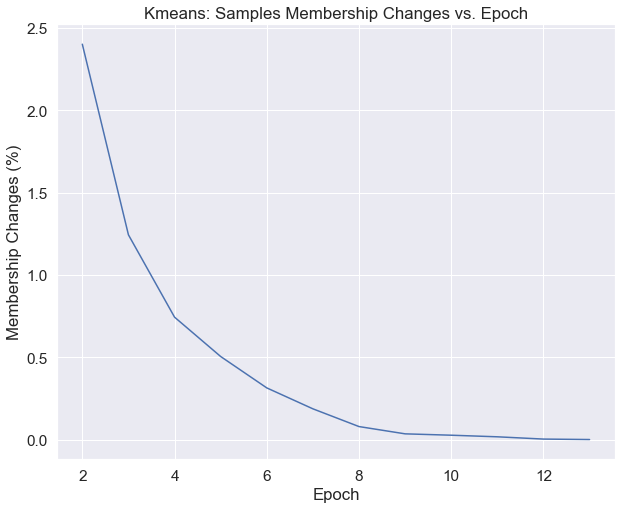

In [152]:
start_time = time()
km = models.kmeans(X_train_PCA_TVT, dist='cosine')
km.fit()
train_time = time() - start_time


print("======================================")
print(f"\033[1m1. Kmeans Train Results \033[0m")
print("======================================")
print(f"Training size {X_train_PCA_TVT.shape[0]}")
print(f"Kmeans training time {train_time} secs")
y_pred = km.predict(X_train_PCA_TVT, y_train)
models.kmeans.classification_report(y_train, y_pred)

print(" ")
print("======================================")
print(f"\033[1m2. Kmeans Validation Results \033[0m")
print("======================================")
print(f"Validation size {X_val_PCA_TVT.shape[0]}")
y_pred = km.predict(X_val_PCA_TVT, y_val)
models.kmeans.classification_report(y_val, y_pred)
km.plot_membership_switches()

### 2. Train SVM

In [149]:
start_time = time()
clf = models.SVC(C=1000, kernel='rbf', gamma=0.001)
clf.fit(X_train_PCA_TVT, y_train)
train_time = time() - start_time

print("======================================")
print(f"\033[1m1. SVM Train Results \033[0m")
print("======================================")
print(f"Training size {X_train_PCA_TVT.shape[0]}")
print(f"SVM training time {train_time} secs")
y_pred = clf.predict(X_train_PCA_TVT)
models.kmeans.classification_report(y_train, y_pred)

print(" ")
print("======================================")
print(f"\033[1m2. SVM Validation Results \033[0m")
print("======================================")
y_pred = clf.predict(X_val_PCA_TVT)
models.kmeans.classification_report(y_val, y_pred)

1. SVM Train Results 
Training size 72336
SVM training time 994.0718257427216 secs
Overall Accuracy: 82.13 %
F1-Score: 0.476
Class 0 accuracy: 96.08 %
Class 1 accuracy: 35.34 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |    53538    |     2186    | 55724 |
| Actual 1 |    10742    |     5870    | 16612 |
|  Total   |    64280    |     8056    | 72336 |
+----------+-------------+-------------+-------+
 
2. SVM Validation Results 
Overall Accuracy: 82.16 %
F1-Score: 0.471
Class 0 accuracy: 96.33 %
Class 1 accuracy: 34.63 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     6710    |     256     |  6966 |
| Actual 1 |     1357    |     719     |  2076 |
|  Total   |     8067    |     975     |  9042 |
+----------+-------------+-

## Testing

### 1. Test KMeans

In [153]:
# Prepare Test Data
X_test_PCA_TVT = X_test_PCA.loc[:, X_test_PCA.columns!='PCA_15'].copy()
X_test_PCA_TVT.reset_index(drop=True)
X_test_PCA_TVT = X_test_PCA_TVT.to_numpy()

print("======================================")
print(f"\033[1m1. Kmeans Test Results \033[0m")
print("======================================")
start_time = time()
y_pred = km.predict(X_test_PCA_TVT, y_test)
test_time = time() - start_time
print(f"Test data size {X_test_PCA_TVT.shape[0]}")
print(f"Kmeans prediction time {test_time} secs")
models.kmeans.classification_report(y_test, y_pred)

print("")
## Compare results from SKLearn's Kmeans
print("======================================")
print(f"\033[1m2. Sklearn Kmeans Test Results \033[0m")
print("======================================")
sk_km = models.KMeans(n_clusters=2, random_state=0).fit(X_train_PCA_TVT)
y_pred = sk_km.predict(X_test_PCA_TVT)
models.kmeans.classification_report(y_test, y_pred)

1. Kmeans Test Results 
Test data size 9043
Kmeans prediction time 0.001194000244140625 secs
Overall Accuracy: 60.96 %
F1-Score: 0.305
Class 0 accuracy: 68.02 %
Class 1 accuracy: 37.31 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     4738    |     2228    |  6966 |
| Actual 1 |     1302    |     775     |  2077 |
|  Total   |     6040    |     3003    |  9043 |
+----------+-------------+-------------+-------+

2. Sklearn Kmeans Test Results 
Overall Accuracy: 57.56 %
F1-Score: 0.308
Class 0 accuracy: 62.47 %
Class 1 accuracy: 41.07 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     4352    |     2614    |  6966 |
| Actual 1 |     1224    |     853     |  2077 |
|  Total   |     5576    |     3467    |  9043 |
+----------+-

### 2. Test SVM

In [154]:
print("======================================")
print(f"\033[1mSVM Test Results \033[0m")
print("======================================")
start_time = time()
y_pred = clf.predict(X_test_PCA_TVT)
test_time = time() - start_time
print(f"Test data size {X_test_PCA_TVT.shape[0]}")
print(f"SVM prediction time {test_time} secs")
models.kmeans.classification_report(y_test, y_pred)

SVM Test Results 
Test data size 9043
SVM prediction time 27.223992109298706 secs
Overall Accuracy: 81.58 %
F1-Score: 0.454
Class 0 accuracy: 95.95 %
Class 1 accuracy: 33.37 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     6684    |     282     |  6966 |
| Actual 1 |     1384    |     693     |  2077 |
|  Total   |     8068    |     975     |  9043 |
+----------+-------------+-------------+-------+


## Evaluation

## Plots

In [ ]:
from project_libs.project import plotter as pl